In [1]:
# this is the only line you need to change
# to build a custom image classification model for any dataset

num_classes = 4
class_labels = ['hello_kitty', 'micky_mouse', 'minion', 'peppa_pig']


In [ ]:
!unzip train.zip

In [3]:
# load images from directory

from keras.utils import image_dataset_from_directory

train_data, valid_data = image_dataset_from_directory(
    directory='train', labels='inferred', class_names=class_labels,
    subset='both', validation_split=0.3,
    image_size=(224, 224), batch_size=64, seed=1555)

Found 267 files belonging to 4 classes.
Using 187 files for training.
Using 80 files for validation.


In [4]:
# load pre-trained model

from keras.applications.resnet50 import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# freeze layers of base model

for layer in base_model.layers:
  layer.trainable = False

In [6]:
# customize model by adding output layers

import keras
from keras import layers

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=(['accuracy']))

In [8]:
model.fit(train_data, validation_data=valid_data, epochs=5)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 60s 20s/step - accuracy: 0.4353 - loss: 1.3384 - val_accuracy: 0.8625 - val_loss: 0.5628
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 76s 18s/step - accuracy: 0.9374 - loss: 0.3365 - val_accuracy: 0.9750 - val_loss: 0.2161
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 55s 21s/step - accuracy: 0.9881 - loss: 0.1091 - val_accuracy: 0.9875 - val_loss: 0.1065
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 21s/step - accuracy: 0.9973 - loss: 0.0435 - val_accuracy: 0.9875 - val_loss: 0.0740
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 53s 21s/step - accuracy: 1.0000 - loss: 0.0188 - val_accuracy: 0.9875 - val_loss: 0.0714


In [ ]:
# make sure to upload at least 20 test samples

!unzip test.zip

In [10]:
# load sample images to test model output

import numpy as np
from keras.utils import load_img

test_sample = []
n = 20

for k in range(n):
    img_file = 'test/' + str(k+1) + ".jpg"
    test_img = load_img(img_file, target_size=(224, 224))
    test_sample.append(test_img)

np.array(test_sample).shape

(20, 224, 224, 3)

In [11]:
# run predictions

y = model.predict(np.array(test_sample))

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


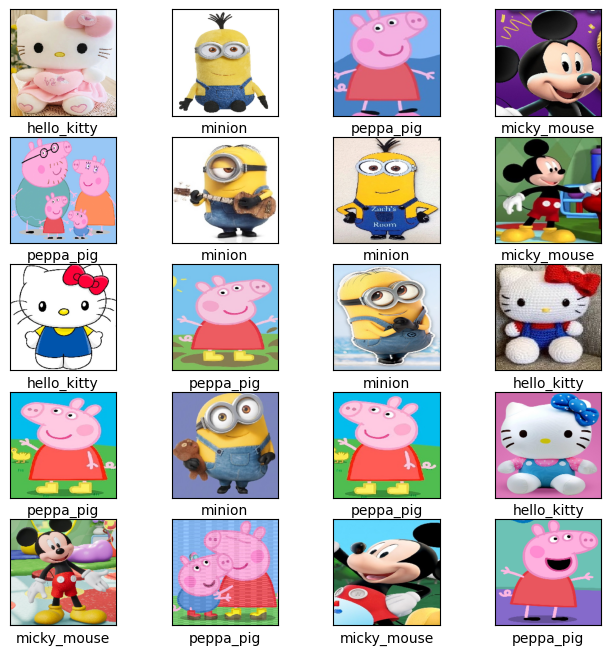

In [12]:
# plot model output predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

for k in range(n):
  plt.subplot(5, 4, k+1)
  plt.imshow(test_sample[k])

  plt.xlabel(class_labels[np.argmax(y[k])])
  plt.xticks([])
  plt.yticks([])